## Testing K-Neighbors algorithm utility for classifying breast cancer cases
By: Daniel Vélez 

Import the python libreries that are going to be used throughout this project.

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data exploration
Observe the dataset to analyze how the training data behaves and making the appropiate transformations

In [31]:
dataset = load_breast_cancer()
df = pd.DataFrame(data= dataset.data, columns= dataset.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


The database has 30 observations, meaning 30 potential features to use for training the classification model. Lets analyze the distribution of from the data:

In [35]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Given that the data varies significant in feature's scales, the data is going to be normalized so every feature has the same scale. This decision is so the model traets every feature as equal.

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
df_norm.describe().loc[['min', 'max']]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


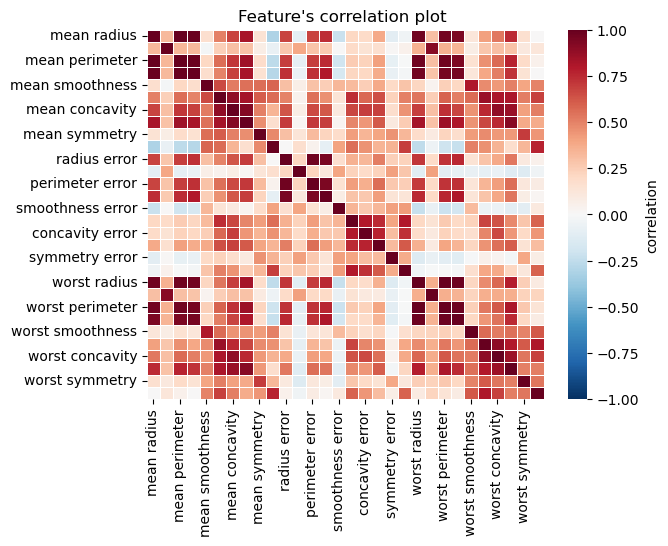

In [70]:
correlation = df_norm.corr()
ax = sns.heatmap(correlation, linewidth=0.5, cbar_kws={'label': 'correlation'}, cmap = 'RdBu_r', vmin=-1, vmax=1)
ax.set_title('Feature\'s correlation plot ')

plt.show()


### Model implementation

In [146]:
## Split the data
labels = dataset.target
X_train, X_test, y_train, y_test = train_test_split(df_norm, labels, random_state= 89, train_size= 0.8)

k_list = range(1, 100)

def classify(X_train, y_train, X_test, k ) : 
    model = KNeighborsClassifier(n_neighbors= k) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [153]:
model = KNeighborsClassifier(n_neighbors= 10) 
model.fit(X_train, y_train)
model.predict(X_test.values)

/Users/danielvelez/miniforge3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

array([[0.62373988, 0.33648969, 0.60334462, ..., 0.48969072, 0.29371181,
        0.02813853],
       [0.32036537, 0.47548191, 0.30923917, ..., 0.20982818, 0.21643998,
        0.05358783],
       [0.36059444, 0.45924924, 0.34676249, ..., 0.46701031, 0.17977528,
        0.08736718],
       ...,
       [0.27966302, 0.14879946, 0.28443093, ..., 0.53642612, 0.21170905,
        0.41164896],
       [0.15234985, 0.26276632, 0.14691452, ..., 0.12271478, 0.25684999,
        0.1511872 ],
       [0.3842586 , 0.22590463, 0.38552968, ..., 0.48900344, 0.20205007,
        0.14921947]])